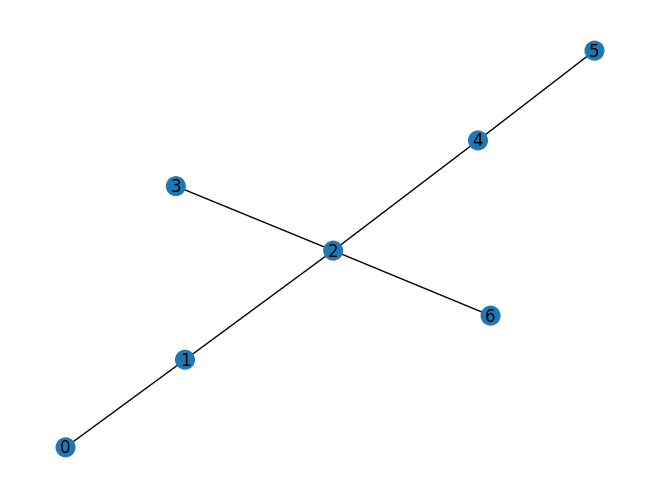

In [ ]:
from MLFM_GCP.circuits.cp_fraction import cp_fraction
from MLFM_GCP.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from MLFM_GCP.partitioning.FM.FM_methods import set_initial_partitions
from MLFM_GCP.circuits.QAOA import QAOA_random

num_qubits = 56
num_partitions = 7
# qpu_sizes = [0,6,6,6,0,0,0,6,6,6]
qpu_sizes = [int(num_qubits/num_partitions)+1]*num_partitions

# circuit = cp_fraction(  num_qubits=num_qubits,
#                         depth=num_qubits,
#                         fraction= 0.3)


circuit = QAOA_random(num_qubits, prob = 0.5, reps = 1)

circuit = transpile(circuit, basis_gates = ['cp', 'u'])
depth = circuit.depth()


coupling = [(0,1),(1,2),(2,3),(3,6),(2,4),(4,5)]
from MLFM_GCP.graphs.quantum_network import QuantumNetwork

network = QuantumNetwork(qpu_sizes, coupling)

network.draw()

In [25]:
graph = QuantumCircuitHyperGraph(circuit, group_gates = True, anti_diag = True)
assignment = set_initial_partitions(qpu_sizes, num_qubits, depth, num_partitions, reduced = True)
print(assignment)

from MLFM_GCP.partitioning.FM.FM_methods import get_all_configs, get_all_costs_hetero

configs = get_all_configs(num_partitions)

costs, edge_tree = get_all_costs_hetero(network, configs)


print(costs)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5

In [26]:
# from MLFM_GCP.partitioning.FM.FM_hetero import run_FM_hetero

# final_cost, final_assignment, cost_list = run_FM_hetero(
#     graph,
#     assignment,
#     qpu_sizes,
#     num_partitions,
#     limit=num_qubits*graph.depth/8,
#     max_gain=4*4,
#     passes=100,
#     stochastic=True,
#     active_nodes=graph.nodes,
#     log = True,
#     add_initial = False,
#     costs = costs,
#     network=network
# )

# print("cost list", cost_list)


In [27]:
from MLFM_GCP.partitioning.FM.multilevel_FM import MLFM_recursive_hetero

final_cost, final_assignment, cost_list = MLFM_recursive_hetero(
    graph,
    assignment,
    qpu_sizes,
    limit='qubit',
    network=network,
    log=True)

Initial cost: 209
All passes complete.
Final cost: 155
Best cost at level 0: 155
Initial cost: 155
All passes complete.
Final cost: 155
Best cost at level 1: 155
Initial cost: 155
All passes complete.
Final cost: 162
Best cost at level 2: 155
Initial cost: 155
All passes complete.
Final cost: 156
Best cost at level 3: 155
Initial cost: 155
All passes complete.
Final cost: 158
Best cost at level 4: 155
Initial cost: 155
All passes complete.
Final cost: 157
Best cost at level 5: 155
Initial cost: 155
All passes complete.
Final cost: 155
Best cost at level 6: 155
Initial cost: 155
All passes complete.
Final cost: 156
Best cost at level 7: 155
Initial cost: 155
All passes complete.
Final cost: 155
Best cost at level 8: 155
Initial cost: 155
All passes complete.
Final cost: 155
Best cost at level 9: 155


In [28]:
from MLFM_GCP.partitioning.FM.multilevel_FM import MLFM_recursive

list_of_assignments, list_of_costs, _ = MLFM_recursive(
    graph,
    assignment,
    qpu_sizes,
    limit='qubit',
    log=True)

from MLFM_GCP.graphs.hypergraph_methods import calculate_full_cost_hetero
import numpy as np

best_assignment = list_of_assignments[np.argmin(list_of_costs)]
print("best assignment", best_assignment)
cost_hetero = calculate_full_cost_hetero(graph, best_assignment, num_partitions, costs)

print(cost_hetero)

Initial cost: 178
All passes complete.
Final cost: 159
Best cost at level 0: 159
Initial cost: 159
All passes complete.
Final cost: 164
Best cost at level 1: 159
Initial cost: 159
All passes complete.
Final cost: 162
Best cost at level 2: 159
Initial cost: 159
All passes complete.
Final cost: 161
Best cost at level 3: 159
Initial cost: 159
All passes complete.
Final cost: 160
Best cost at level 4: 159
Initial cost: 159
All passes complete.
Final cost: 160
Best cost at level 5: 159
Initial cost: 159
All passes complete.
Final cost: 162
Best cost at level 6: 159
Initial cost: 159
All passes complete.
Final cost: 160
Best cost at level 7: 159
Initial cost: 159
All passes complete.
Final cost: 159
Best cost at level 8: 159
Initial cost: 159
All passes complete.
Final cost: 159
Best cost at level 9: 159
best assignment [[0 6 6 ... 1 1 1]
 [0 6 6 ... 1 1 1]
 [0 6 6 ... 1 1 1]
 ...
 [0 6 6 ... 1 1 1]
 [0 6 6 ... 1 1 1]
 [0 6 6 ... 1 1 1]]
190
